# Further Exploration With Clustering on Smaller Dataset

In [1]:
# !pip install hdbscan

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.cluster import KMeans

from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import hdbscan
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt


import tensorflow as tf
import pickle

In [3]:
path_train = '/content/drive/My Drive/ai_project_2021/train.csv'
df = pd.read_csv(path_train, index_col = 'id')
df_smaller = pd.read_csv('/content/drive/My Drive/ai_project_2021/df_smaller1.csv', index_col = 'Unnamed: 0')
df = df.reset_index(drop=True)
df.head()

cleanup_categories = {'Gender': {'Male': 0, 'Female': 1},
                      'Vehicle_Damage': {'Yes': 1, 'No': 0},
                      'Vehicle_Age': {'> 2 Years': 1, '< 1 Year': 0, '1-2 Year': 0.5}}

df = df.replace(cleanup_categories)
df = df[df.index.isin(df_smaller.index)]


# define dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

### We have written two functions here. The first checks clusters and plots the percentage of positive classes (out of total positive classes) within clusters whose positive class density is under a given threshold.

### The second function is similar, but plots the percentage of the entire dataset that is comprised by the clusters selected by a given threshold.

### Ideally, what we would see is a clustering algorithm that identifies clusters representing a significant portion of the dataset, and each of those clusters would be very low-density concerning positive classifications according to the original dataset label feature.

In [4]:
# Function to have a visual representation of an optimal threshold for clustering

def find_optimal_threshold():

  thresholds = np.arange(0.01, 0.3, 0.005)
  percentages = list(np.zeros(len(thresholds))) 

  for i in range (len(thresholds)):
    total_positives = 0
    total_samples = 0

    for k, v in cluster_counts.items():
      if v[0] / v[1] < thresholds[i]:
        total_positives += v[0]
        total_samples += v[1]
    if total_samples > 0:
      percentages[i] = ( total_positives / total_samples * 100 )

  fig, ax = plt.subplots()
  ax.plot(thresholds, percentages)

  ax.set(xlabel='Threshold Percentage', ylabel='Density of Positives',
        title='Threshold v Density')
  ax.grid()
  plt.show()

# Function to have a visual representation of an optimal threshold for clustering

def display_percentage_of_data():

  percentages = []
  thresholds = np.arange(0.01, 0.3, 0.005)

  for i in thresholds:
    total_samples = 0

    for k, v in cluster_counts.items():
      if v[0] / v[1] < i:
        total_samples += v[1]

    percentages.append( total_samples / len(X))

  fig, ax = plt.subplots()
  ax.plot(thresholds, percentages)

  ax.set(xlabel='Threshold Percentage', ylabel='Percentage of Dataset',
        title='Threshold v Percentage of Dataset')
  ax.grid()
  plt.show()


# Clustering on Smaller Dataset

### We apply several clustering algorithms to our dataset, first without any feature scaling. We then run the same clustering algorithms on a version of the dataset that has been scaled with MinMaxScaler. Finally, we do the same but with StandardScaler.

In [5]:
# define the model
model = MiniBatchKMeans(n_clusters=6)
# fit the model
model.fit(X)
# assign a cluster to each example
predictions = model.predict(X)

In [6]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster 0 : 23.71 %   of 32230 samples
Occurrence of positives in cluster 1 : 19.9 %   of 36127 samples
Occurrence of positives in cluster 2 : 22.69 %   of 55761 samples
Occurrence of positives in cluster 3 : 26.02 %   of 1545 samples
Occurrence of positives in cluster 4 : 25.23 %   of 8407 samples
Occurrence of positives in cluster 5 : 21.67 %   of 43978 samples


Occurrence of positives in data : 22.21 %


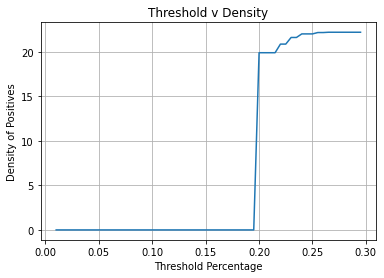

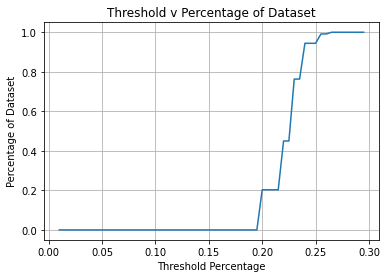

In [7]:
find_optimal_threshold()
display_percentage_of_data()

In [8]:
model = GaussianMixture(n_components=9)
model.fit(X)
predictions = model.predict(X)

In [9]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster 0 : 28.57 %   of 48681 samples
Occurrence of positives in cluster 1 : 11.75 %   of 26340 samples
Occurrence of positives in cluster 2 : 20.87 %   of 34261 samples
Occurrence of positives in cluster 3 : 0.88 %   of 4297 samples
Occurrence of positives in cluster 4 : 30.02 %   of 49465 samples
Occurrence of positives in cluster 5 : 2.86 %   of 2028 samples
Occurrence of positives in cluster 6 : 2.55 %   of 5215 samples
Occurrence of positives in cluster 7 : 11.24 %   of 676 samples
Occurrence of positives in cluster 8 : 3.2 %   of 7085 samples


Occurrence of positives in data : 22.21 %


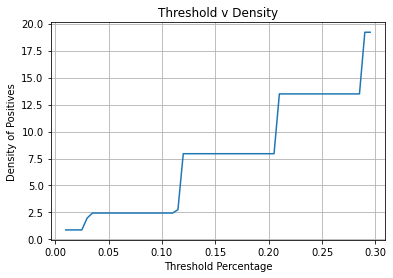

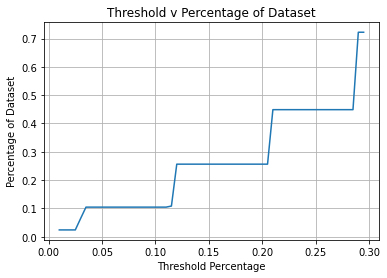

In [10]:
find_optimal_threshold()
display_percentage_of_data()

In [11]:
model = hdbscan.HDBSCAN()
model.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [12]:
len(np.where(model.labels_ == -1))
predictions = model.labels_

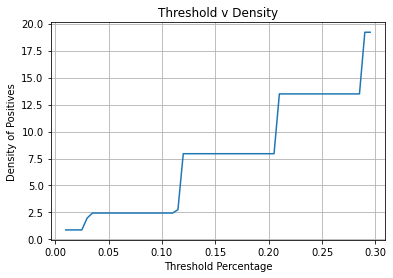

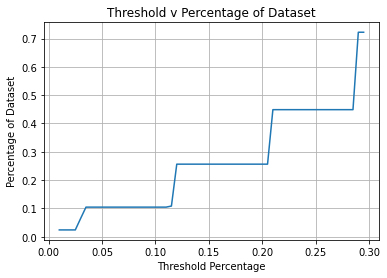

In [13]:
find_optimal_threshold()
display_percentage_of_data()

In [14]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster -1 : 21.48 %   of 84453 samples
Occurrence of positives in cluster 0 : 42.86 %   of 7 samples
Occurrence of positives in cluster 1 : 27.27 %   of 11 samples
Occurrence of positives in cluster 2 : 20.0 %   of 10 samples
Occurrence of positives in cluster 3 : 50.0 %   of 6 samples
Occurrence of positives in cluster 4 : 30.0 %   of 10 samples
Occurrence of positives in cluster 5 : 36.36 %   of 11 samples
Occurrence of positives in cluster 6 : 11.11 %   of 9 samples
Occurrence of positives in cluster 7 : 30.77 %   of 13 samples
Occurrence of positives in cluster 8 : 28.57 %   of 7 samples
Occurrence of positives in cluster 9 : 25.0 %   of 8 samples
Occurrence of positives in cluster 10 : 18.18 %   of 11 samples
Occurrence of positives in cluster 11 : 42.86 %   of 7 samples
Occurrence of positives in cluster 12 : 42.86 %   of 21 samples
Occurrence of positives in cluster 13 : 23.08 %   of 13 samples
Occurrence of positives in cluster 14 : 23.53 %   of 17 s

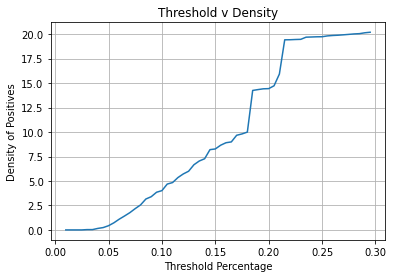

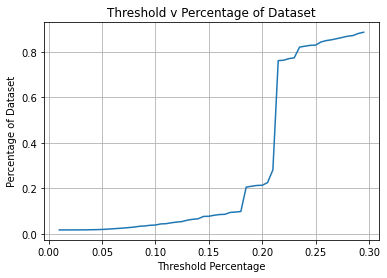

In [15]:
find_optimal_threshold()
display_percentage_of_data()

# Standard Scaling

In [16]:
#Resetting X

path_train = '/content/drive/My Drive/ai_project_2021/train.csv'
df = pd.read_csv(path_train, index_col = 'id')
df_smaller = pd.read_csv('/content/drive/My Drive/ai_project_2021/df_smaller1.csv', index_col = 'Unnamed: 0')
df = df.reset_index(drop=True)
df.head()

cleanup_categories = {'Gender': {'Male': 0, 'Female': 1},
                      'Vehicle_Damage': {'Yes': 1, 'No': 0},
                      'Vehicle_Age': {'> 2 Years': 1, '< 1 Year': 0, '1-2 Year': 0.5}}

df = df.replace(cleanup_categories)
df = df[df.index.isin(df_smaller.index)]


# define dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

In [17]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [18]:
model = DBSCAN(eps=0.3, min_samples=50)
predictions = model.fit_predict(X)

In [19]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster -1 : 21.73 %   of 127293 samples
Occurrence of positives in cluster 0 : 29.93 %   of 8479 samples
Occurrence of positives in cluster 1 : 11.31 %   of 2961 samples
Occurrence of positives in cluster 2 : 33.52 %   of 9131 samples
Occurrence of positives in cluster 3 : 9.98 %   of 6626 samples
Occurrence of positives in cluster 4 : 31.15 %   of 4408 samples
Occurrence of positives in cluster 5 : 34.7 %   of 5530 samples
Occurrence of positives in cluster 6 : 14.51 %   of 3612 samples
Occurrence of positives in cluster 7 : 7.96 %   of 4520 samples
Occurrence of positives in cluster 8 : 25.88 %   of 765 samples
Occurrence of positives in cluster 9 : 10.43 %   of 1621 samples
Occurrence of positives in cluster 10 : 29.11 %   of 584 samples
Occurrence of positives in cluster 11 : 35.74 %   of 333 samples
Occurrence of positives in cluster 12 : 13.77 %   of 385 samples
Occurrence of positives in cluster 13 : 13.25 %   of 536 samples
Occurrence of positives in

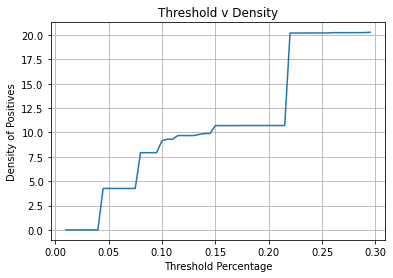

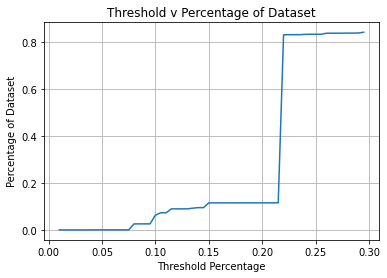

In [20]:
find_optimal_threshold()
display_percentage_of_data()

In [21]:
model = MiniBatchKMeans(n_clusters=15)
model.fit(X)
predictions = model.predict(X)

In [22]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster 0 : 15.05 %   of 17100 samples
Occurrence of positives in cluster 1 : 30.13 %   of 15747 samples
Occurrence of positives in cluster 2 : 27.71 %   of 14747 samples
Occurrence of positives in cluster 3 : 28.62 %   of 18927 samples
Occurrence of positives in cluster 4 : 27.55 %   of 14078 samples
Occurrence of positives in cluster 5 : 0.85 %   of 6084 samples
Occurrence of positives in cluster 6 : 26.92 %   of 10447 samples
Occurrence of positives in cluster 7 : 6.0 %   of 517 samples
Occurrence of positives in cluster 8 : 26.98 %   of 10391 samples
Occurrence of positives in cluster 9 : 3.25 %   of 7531 samples
Occurrence of positives in cluster 10 : 4.11 %   of 9275 samples
Occurrence of positives in cluster 11 : 14.77 %   of 18066 samples
Occurrence of positives in cluster 12 : 29.11 %   of 13987 samples
Occurrence of positives in cluster 13 : 26.29 %   of 6131 samples
Occurrence of positives in cluster 14 : 27.7 %   of 15020 samples


Occurrence of p

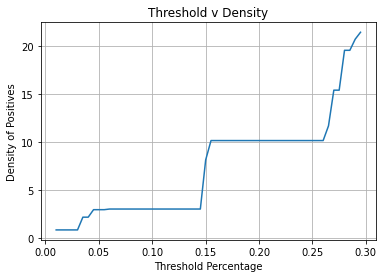

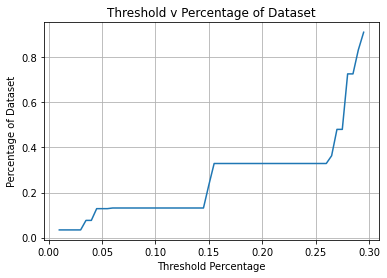

In [23]:
find_optimal_threshold()
display_percentage_of_data()

In [24]:
model = GaussianMixture(n_components=15)
model.fit(X)
predictions = model.predict(X)

In [25]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster 0 : 17.5 %   of 17797 samples
Occurrence of positives in cluster 1 : 23.75 %   of 3995 samples
Occurrence of positives in cluster 2 : 30.54 %   of 16590 samples
Occurrence of positives in cluster 3 : 6.0 %   of 517 samples
Occurrence of positives in cluster 4 : 21.97 %   of 6464 samples
Occurrence of positives in cluster 5 : 33.19 %   of 943 samples
Occurrence of positives in cluster 6 : 28.26 %   of 27279 samples
Occurrence of positives in cluster 7 : 27.8 %   of 22647 samples
Occurrence of positives in cluster 8 : 3.3 %   of 8572 samples
Occurrence of positives in cluster 9 : 12.44 %   of 18440 samples
Occurrence of positives in cluster 10 : 0.85 %   of 6087 samples
Occurrence of positives in cluster 11 : 4.17 %   of 8231 samples
Occurrence of positives in cluster 12 : 27.77 %   of 36578 samples
Occurrence of positives in cluster 13 : 38.76 %   of 3885 samples
Occurrence of positives in cluster 14 : 8.7 %   of 23 samples


Occurrence of positives in

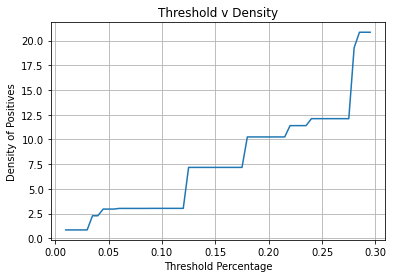

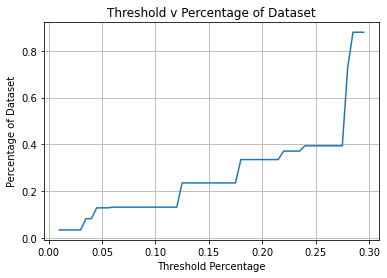

In [26]:
find_optimal_threshold()
display_percentage_of_data()

In [27]:
model = hdbscan.HDBSCAN()
model.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [28]:
len(np.where(model.labels_ == -1))
predictions = model.labels_

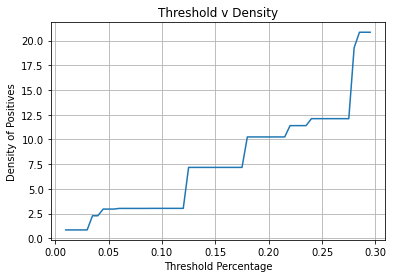

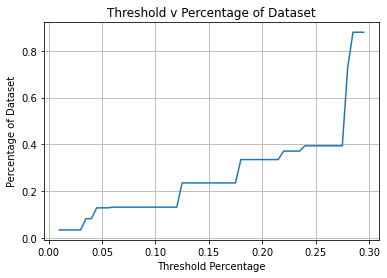

In [29]:
find_optimal_threshold()
display_percentage_of_data()

In [30]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster -1 : 15.71 %   of 522 samples
Occurrence of positives in cluster 0 : 0.0 %   of 35 samples
Occurrence of positives in cluster 1 : 0.0 %   of 45 samples
Occurrence of positives in cluster 2 : 7.09 %   of 437 samples
Occurrence of positives in cluster 3 : 60.0 %   of 5 samples
Occurrence of positives in cluster 4 : 0.85 %   of 3399 samples
Occurrence of positives in cluster 5 : 2.44 %   of 41 samples
Occurrence of positives in cluster 6 : 0.72 %   of 279 samples
Occurrence of positives in cluster 7 : 1.25 %   of 1526 samples
Occurrence of positives in cluster 8 : 0.0 %   of 69 samples
Occurrence of positives in cluster 9 : 0.14 %   of 723 samples
Occurrence of positives in cluster 10 : 4.12 %   of 3399 samples
Occurrence of positives in cluster 11 : 3.7 %   of 432 samples
Occurrence of positives in cluster 12 : 4.74 %   of 4869 samples
Occurrence of positives in cluster 13 : 28.57 %   of 14 samples
Occurrence of positives in cluster 14 : 3.12 %   of 417

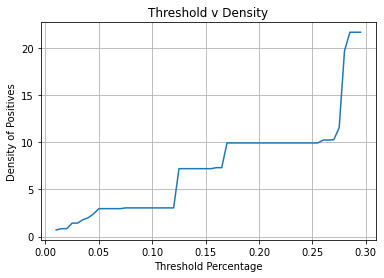

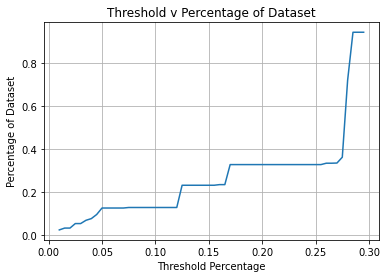

In [31]:
find_optimal_threshold()
display_percentage_of_data()

# MinMax Scaling

In [32]:
#Resetting X

path_train = '/content/drive/My Drive/ai_project_2021/train.csv'
df = pd.read_csv(path_train, index_col = 'id')
df_smaller = pd.read_csv('/content/drive/My Drive/ai_project_2021/df_smaller1.csv', index_col = 'Unnamed: 0')
df = df.reset_index(drop=True)
df.head()

cleanup_categories = {'Gender': {'Male': 0, 'Female': 1},
                      'Vehicle_Damage': {'Yes': 1, 'No': 0},
                      'Vehicle_Age': {'> 2 Years': 1, '< 1 Year': 0, '1-2 Year': 0.5}}

df = df.replace(cleanup_categories)
df = df[df.index.isin(df_smaller.index)]


# define dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

In [33]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [34]:
model = MiniBatchKMeans(n_clusters=10)
model.fit(X)
predictions = model.predict(X)

In [35]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster 0 : 3.34 %   of 8507 samples
Occurrence of positives in cluster 1 : 19.24 %   of 20808 samples
Occurrence of positives in cluster 2 : 27.77 %   of 21615 samples
Occurrence of positives in cluster 3 : 24.97 %   of 17158 samples
Occurrence of positives in cluster 4 : 25.83 %   of 38314 samples
Occurrence of positives in cluster 5 : 4.16 %   of 8272 samples
Occurrence of positives in cluster 6 : 11.74 %   of 14338 samples
Occurrence of positives in cluster 7 : 23.1 %   of 13590 samples
Occurrence of positives in cluster 8 : 27.84 %   of 18683 samples
Occurrence of positives in cluster 9 : 28.04 %   of 16763 samples


Occurrence of positives in data : 22.21 %


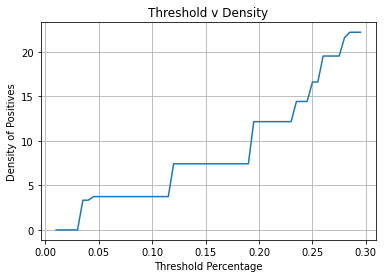

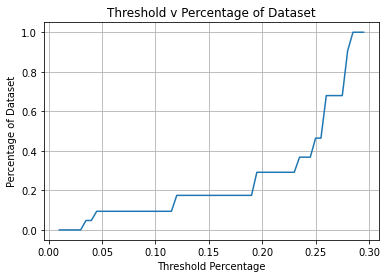

In [36]:
find_optimal_threshold()
display_percentage_of_data()

In [37]:
model = GaussianMixture(n_components=9)
model.fit(X)
predictions = model.predict(X)

In [38]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster 0 : 3.3 %   of 8599 samples
Occurrence of positives in cluster 1 : 26.25 %   of 26458 samples
Occurrence of positives in cluster 2 : 30.34 %   of 9068 samples
Occurrence of positives in cluster 3 : 26.87 %   of 29296 samples
Occurrence of positives in cluster 4 : 27.99 %   of 20996 samples
Occurrence of positives in cluster 5 : 16.59 %   of 16628 samples
Occurrence of positives in cluster 6 : 4.16 %   of 8272 samples
Occurrence of positives in cluster 7 : 26.33 %   of 39576 samples
Occurrence of positives in cluster 8 : 11.93 %   of 19155 samples


Occurrence of positives in data : 22.21 %


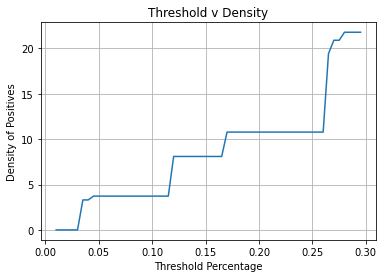

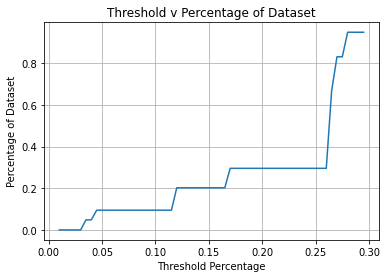

In [39]:
find_optimal_threshold()
display_percentage_of_data()

In [40]:
model = hdbscan.HDBSCAN()
model.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [41]:
len(np.where(model.labels_ == -1))
predictions = model.labels_

In [42]:
clusters = {}
cluster_counts = {}

for j in np.unique(predictions):
  positives_in_cluster = [y.values[i] for i in np.where(predictions == j)[0]].count(1) / len(np.where(predictions == j)[0])*100
  clusters[j] = positives_in_cluster
  cluster_counts[j] = [ [y.values[i] for i in np.where(predictions == j)[0]].count(1) , len(np.where(predictions == j)[0]) ]
  print(f"Occurrence of positives in cluster {j} : {round( positives_in_cluster, 2)} %   of {len(np.where(predictions == j)[0])} samples")

print('\n')

print(f"Occurrence of positives in data : { round (list(y).count(1) / len(y) * 100, 2)} %")

Occurrence of positives in cluster -1 : 22.98 %   of 3138 samples
Occurrence of positives in cluster 0 : 0.0 %   of 10 samples
Occurrence of positives in cluster 1 : 0.0 %   of 35 samples
Occurrence of positives in cluster 2 : 0.0 %   of 10 samples
Occurrence of positives in cluster 3 : 0.0 %   of 25 samples
Occurrence of positives in cluster 4 : 6.67 %   of 15 samples
Occurrence of positives in cluster 5 : 3.7 %   of 432 samples
Occurrence of positives in cluster 6 : 28.09 %   of 39674 samples
Occurrence of positives in cluster 7 : 0.0 %   of 18 samples
Occurrence of positives in cluster 8 : 2.7 %   of 4745 samples
Occurrence of positives in cluster 9 : 26.04 %   of 1179 samples
Occurrence of positives in cluster 10 : 12.46 %   of 18457 samples
Occurrence of positives in cluster 11 : 20.0 %   of 5 samples
Occurrence of positives in cluster 12 : 3.37 %   of 505 samples
Occurrence of positives in cluster 13 : 4.78 %   of 4878 samples
Occurrence of positives in cluster 14 : 27.99 %   of 

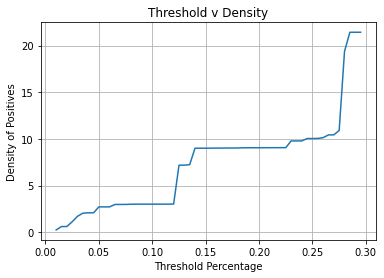

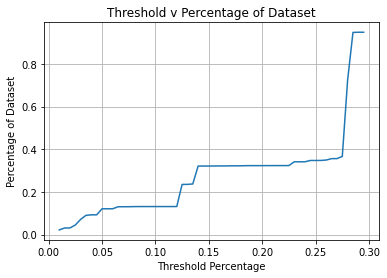

In [43]:
find_optimal_threshold()
display_percentage_of_data()

### We will use HDBScan on the MinMax scaled dataset with a density threshold of 12%.

In [45]:
pickle.dump(model, open('/content/drive/My Drive/ai_project_2021/final_hdbscan2.model', 'wb'))

# Creating a Model For New Clustering Labels

In [46]:
path_train = '/content/drive/My Drive/ai_project_2021/train.csv'
df = pd.read_csv(path_train, index_col = 'id')
df_smaller = pd.read_csv('/content/drive/My Drive/ai_project_2021/df_smaller1.csv', index_col = 'Unnamed: 0')
# df_smaller2 = pd.read_csv('/content/drive/My Drive/ai_project_2021/df_smaller2.csv', index_col = 'Unnamed: 0')
df = df.reset_index(drop=True)
df.head()

cleanup_categories = {'Gender': {'Male': 0, 'Female': 1},
                      'Vehicle_Damage': {'Yes': 1, 'No': 0},
                      'Vehicle_Age': {'> 2 Years': 1, '< 1 Year': 0, '1-2 Year': 0.5}}

df = df.replace(cleanup_categories)
df = df[df.index.isin(df_smaller.index)]
# df = df[df.index.isin(df_smaller2.index)]

In [47]:
positive_clusters = [k for k, v in cluster_counts.items() if v[0]/v[1] >= 0.12]
negative_clusters = [k for k, v in cluster_counts.items() if v[0]/v[1] < 0.12]

positive_indices = [i for i in range(len(predictions)) if predictions[i] in positive_clusters]
negative_indices = [i for i in range(len(predictions)) if predictions[i] in negative_clusters]

print(df.iloc[positive_indices]['Response'].value_counts())
print(df.iloc[negative_indices]['Response'].value_counts())

0    115837
1     38828
Name: Response, dtype: int64
0    22675
1      708
Name: Response, dtype: int64


In [48]:
df_responses = pd.DataFrame(df.iloc[:,df.shape[1]-1])
clustered = np.zeros(len(predictions))
clustered[positive_indices] = 1
df['Clustered'] = clustered

In [49]:
# df.loc[df['Clustered'] == 1].drop(['Clustered'], axis=1).to_csv('/content/drive/My Drive/ai_project_2021/df_smaller2.csv')

In [50]:
df = df.loc[df['Clustered'] == 1].drop(['Clustered'], axis=1)

### Now we will redo the feature engineering from the first section at the very beginning

In [51]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,1.0,1,40454.0,26.0,217,1
2,0,47,1,28.0,0,1.0,1,38294.0,26.0,27,1
5,1,24,1,33.0,0,0.0,1,2630.0,160.0,176,0
6,0,23,1,11.0,0,0.0,1,23367.0,152.0,249,0
7,1,56,1,28.0,0,0.5,1,32031.0,26.0,72,1
...,...,...,...,...,...,...,...,...,...,...,...
381098,1,68,1,33.0,0,1.0,1,36326.0,26.0,196,0
381099,1,51,1,28.0,0,0.5,1,44504.0,26.0,71,0
381100,1,29,1,28.0,0,0.0,1,49007.0,124.0,137,0
381101,1,70,1,28.0,0,1.0,1,50904.0,122.0,215,0


In [52]:
one_hot_policy = pd.get_dummies(df['Policy_Sales_Channel'], prefix='Pol', prefix_sep='_ ')
one_hot_region = pd.get_dummies(df['Region_Code'], prefix='Reg', prefix_sep='_ ')
df.drop(['Policy_Sales_Channel', 'Region_Code'], axis = 1, inplace=True)
df_one_hot = df.drop(['Response'], axis=1).join(one_hot_region).join(one_hot_policy).join(df.iloc[:,-1])


In [53]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_one_hot))
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_one_hot))

In [54]:
X = df_minmax.iloc[:,:-2]
y = df.iloc[:,-1]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

In [55]:
# XGBoost model

# fit model no training data
model = XGBClassifier(random_state=7)
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     17207
           1       1.00      0.00      0.00      5993

    accuracy                           0.74     23200
   macro avg       0.87      0.50      0.43     23200
weighted avg       0.81      0.74      0.63     23200



In [57]:
# first neural network with keras make predictions

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/5
4109/4109 [==============================] - 5s 1ms/step - loss: 0.5482
Epoch 2/5
4109/4109 [==============================] - 5s 1ms/step - loss: 0.5308
Epoch 3/5
4109/4109 [==============================] - 5s 1ms/step - loss: 0.5301
Epoch 4/5
4109/4109 [==============================] - 5s 1ms/step - loss: 0.5292
Epoch 5/5
4109/4109 [==============================] - 5s 1ms/step - loss: 0.5269


In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     17207
           1       0.00      0.00      0.00      5993

    accuracy                           0.74     23200
   macro avg       0.37      0.50      0.43     23200
weighted avg       0.55      0.74      0.63     23200



In [59]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predictions = model.predict(X_test) # 0:Overcast, 2:Mild
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83     17207
           1       0.38      0.11      0.17      5993

    accuracy                           0.72     23200
   macro avg       0.56      0.52      0.50     23200
weighted avg       0.65      0.72      0.66     23200



### Unfortunately we do not feel we have any viable models for this at this time. Perhaps with more time and exploration, we would be able to find some kind of new way to divide the data. 